## Principle Component Analysis (PCA)
: 가장 분산이 큰 방향으로 새롭게 축을 정의하여 차원 축소하는 방법

[배경]
- 독립변수(특성)들이 많을 경우, 유의미한 특성을 찾기 어려울 뿐더러 훈련을 느리게 해 결과적으로 성능 저하를 일으킴.
- 이를 '차원의 저주'라고 함.

[PCA의 원리]
- 분산을 최대로 보존할 수 있는 축을 선택함으로써, 정보를 가장 적게 손실함.
- 분산이 커야 데이터들 사이의 차이점이 명확해짐
- 따라서, PCA에서는 분산이 최대인 축을 찾고 이 축에 직교하고 남은 분산을 최대한 보존하는 두번째 축을 찾음

### <PCA 분석의 단계>

1. d차원 데이터셋을 표준화 전처리 (d는 특성 개수)


2. 공분산 행렬(covariance matrix) 만듦


3. 공분산 행렬을 고유 벡터(eigenvector)와 고윳값(eigenvalue)으로 분해


4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위 매김


5. 고윳값이 가장 큰 k개의 고유 벡터를 선택. (k: 새로운 특성 부분 공간의 차원) ($k<=d$)


6. 최상위 k개의 고유 벡터로 투영 행렬(projection matrix) $W$를 만듦


7. 투영 행렬 $W$를 사용해서 d차원 입력 데이터셋 $X$를 새로운 k차원의 특성 부분 공간으로 변환

In [5]:
# 기본 데이터 분석을 위한 Library
import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn에 있는 기본 데이터셋을 가져오기 위한
from sklearn import datasets

from sklearn.model_selection import train_test_split

In [8]:
## 데이터 불러오기
df_wine = datasets.load_wine()
X, y = df_wine['data'], df_wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

### 1. 주성분 추출

In [9]:
### 1. 데이터 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
### 2. 공분산 행렬 구하기
cov_mat = np.cov(X_train_std.T)

In [12]:
### 3. 공분산 행렬의 고윳값과 고유 벡터 구하기
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고윳값 \n',eigen_vals)


고윳값 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [16]:
### 4. 고윳값을 내림차순으로 정렬
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

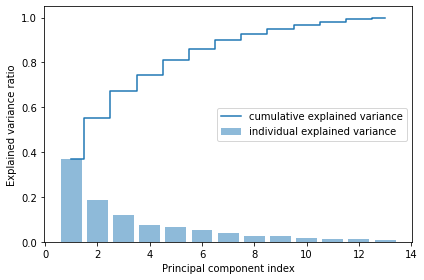

In [24]:
'''첫 번째 주성분이 분산의 거의 40%를 커버하고 있음'''
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 2. 특성 변환

In [26]:
### 1. 고윳값이 가장 큰 k개의 고유 벡터 선택
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
              for i in range(len(eigen_vals))] # (고윳값, 고유 벡터) 튜플 리스트 만듦
eigen_pairs.sort(key=lambda k: k[0], reverse=True) # 고윳값 기준 내림차순으로 정렬

In [27]:
### 2. 최상위 k개의 고유 벡터로 투영 행렬 W를 만듦
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis])) # k=2
print('투영 행렬 W:\n', W)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


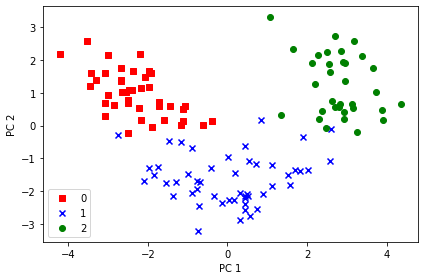

In [29]:
### 3. 투영 행렬 W를 사용하여 d차원을 k차원으로 변환 (시각화)
X_train_pca = X_train_std.dot(W)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
               X_train_pca[y_train==l, 1],
               c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()